# Linear regression using SKLearn on your own Data!
This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!

In [9]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics

# Data Loading, Cleaning, and Setup

Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [29]:
melanoma_df = pd.read_csv("train.csv") #TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

In [30]:
melanoma_df.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [31]:
#cleaning the data -- dropping missing and duplicate values for sanity
melanoma_df.dropna(inplace = True)
melanoma_df.drop_duplicates(inplace = True)
melanoma_df = my_data.reset_index(drop=True)

length = len(melanoma_df.index) #save length of array of later

Linear regression naturally works best on highly correlated data, so I'm going to create a heatmap to see which variables are correlated! 

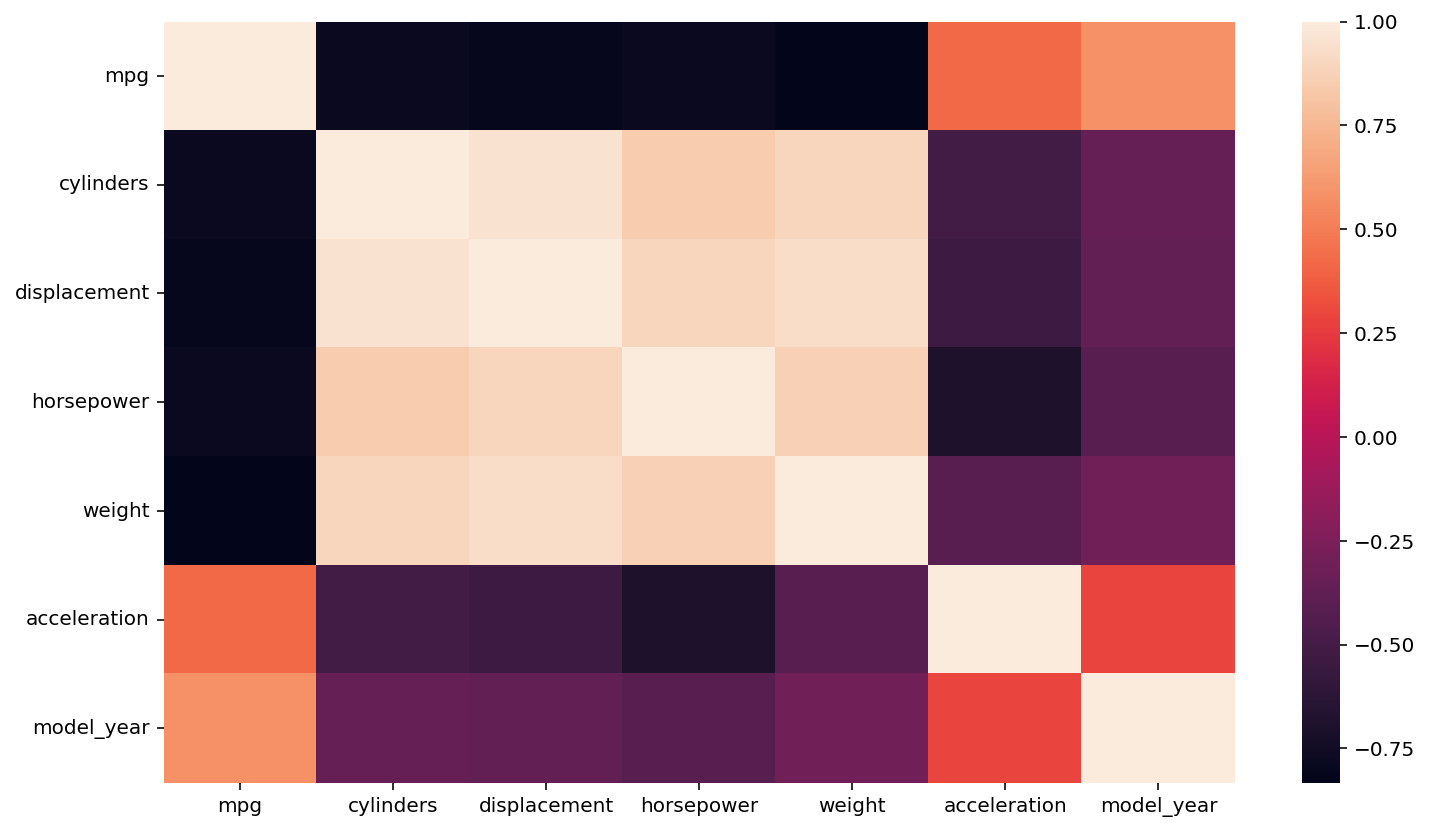

In [33]:
sns.heatmap(melanoma_df.corr())

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.


In [14]:
X = my_data["horsepower"].to_numpy()
y = my_data["mpg"].to_numpy()

# Linear Regression with Scikit-learn's linear regression

We can use Scikit-Learn’s Linear Regression to fit the model. Most other models we will use in the course 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Split the data
Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.

np docs - https://numpy.org/doc/stable/reference/index.html#reference

In [15]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

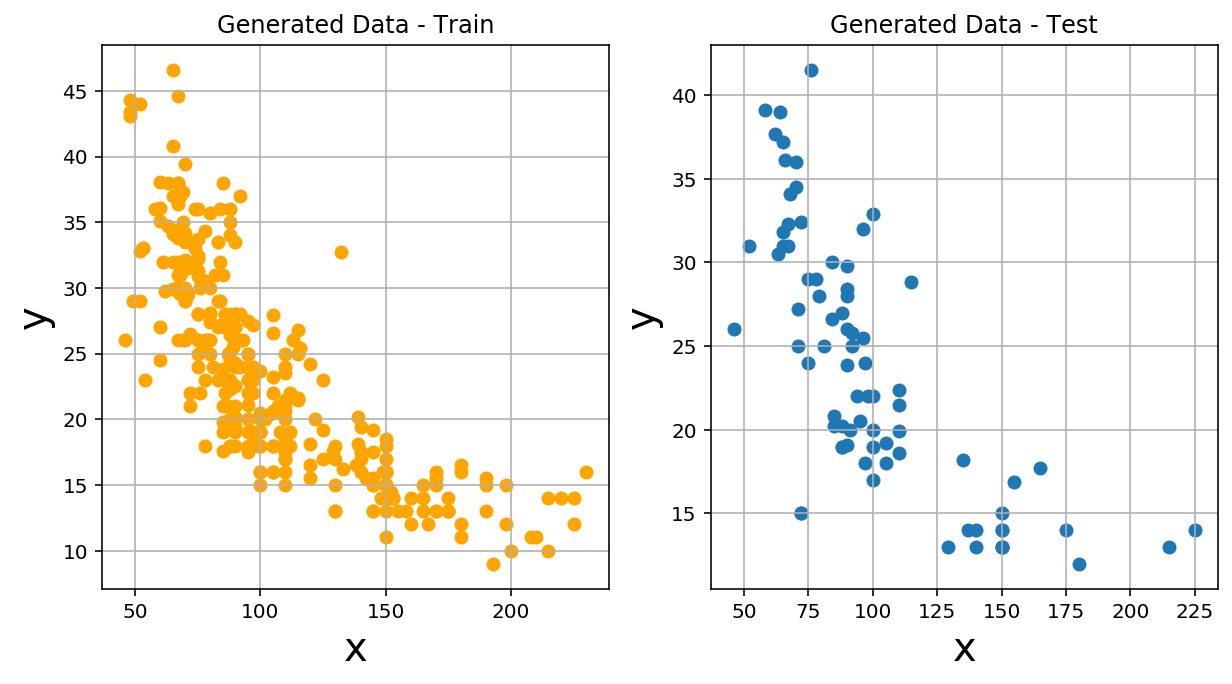

In [16]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

### Creating and Fitting

In [17]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)


LinearRegression()

### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [18]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

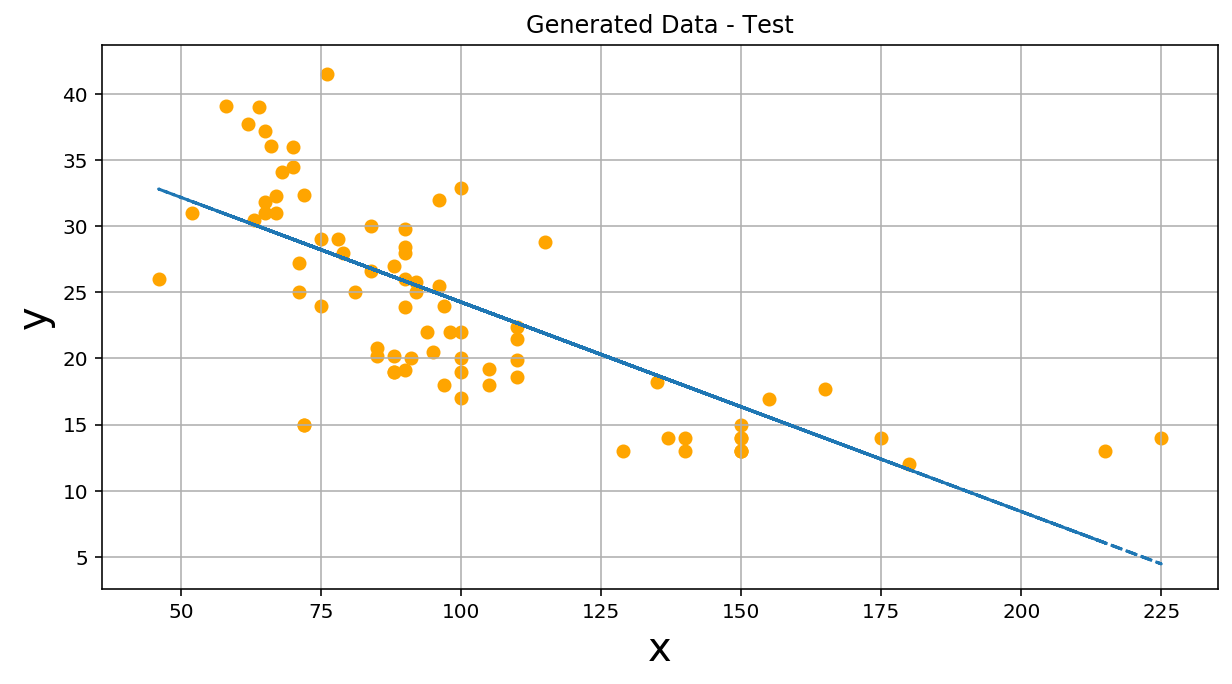

In [19]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

### Results and Evaluation
One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).

In [20]:
print(linr.score(x_test, y_test))

0.533536450925174


In [0]:
MAE = np.mean(abs(y_test - y_hat))
MAE

7.756195456791836

# Repeat the process!

Try running linear regression on multiple combinations of features (columns) on your dataset. What combination yields the best score? How does this connect to your correlation chart? 



In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

melanoma_df = pd.read_csv("train.csv")
melanoma_df.head()
length= len(melanoma_df.index)
columns= ["damage_size", "mass_npea", "size_npear", "malign_ratio", "err_malign", "damage_size", "exposed_area", "std_dev_malign", "malign_penalty", "damage_ratio"]


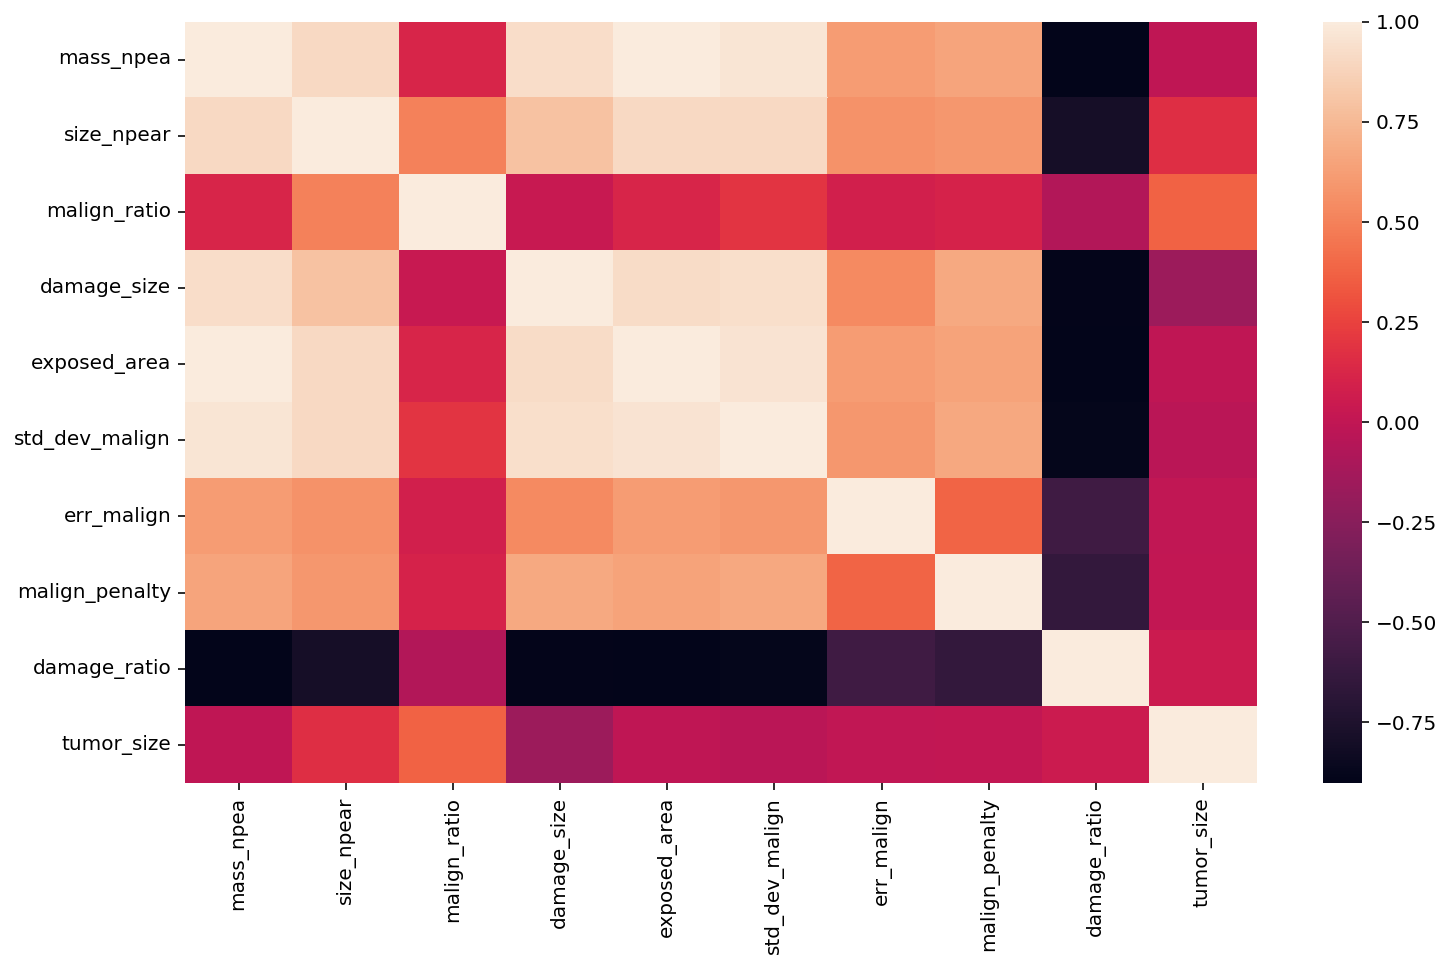

In [37]:
sns.heatmap(melanoma_df.corr())

In [81]:
X = melanoma_df["mass_npea"].to_numpy()
y = melanoma_df["tumor_size"].to_numpy()

In [82]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
  print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")
  
idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!, idx= index
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
test_idx = idx[split_threshold:]

# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]
x_train= x_train.reshape(-1, 1) #in reshape, -1 refers to an unknown dimesion that the reshape() function calculates for you
y_train= y_train.reshape(-1, 1) #reshaping changes the shape of the array to make it more compatible for further calculations, why didn't we reshape y_test????
x_test = x_test.reshape(-1, 1)

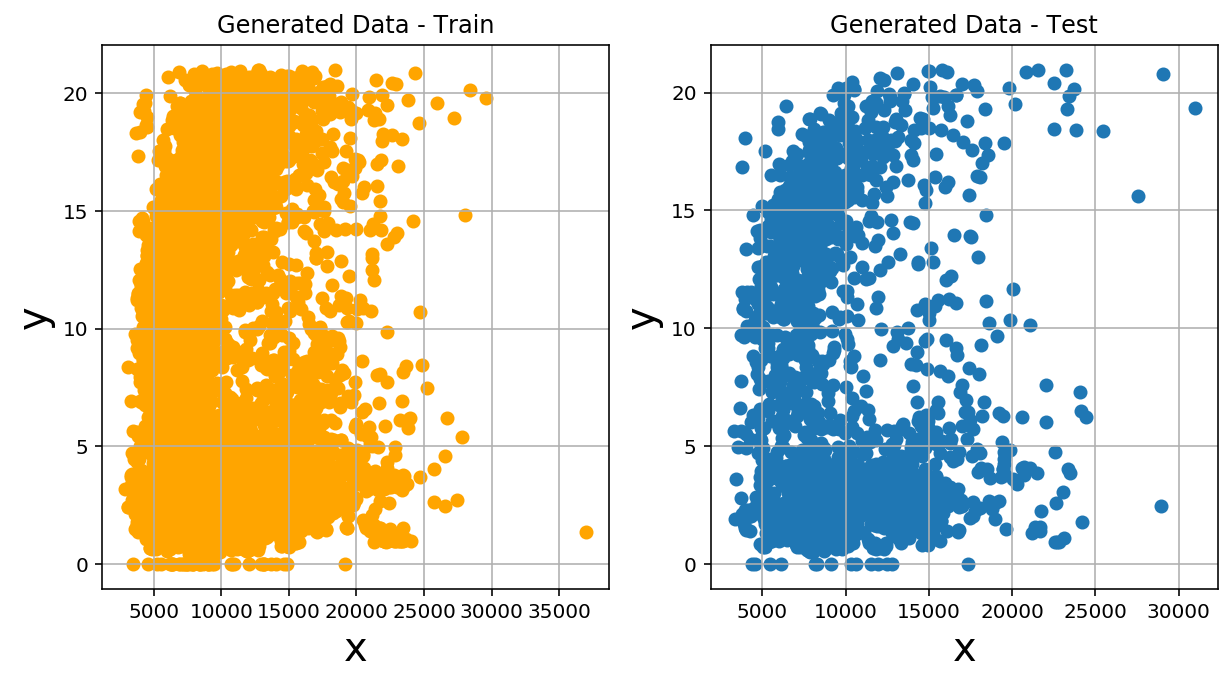

In [83]:
#let's plot our split data to see how it looks!
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train,y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')

# plot the test set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

In [50]:
from sklearn.linear_model import LinearRegression
#Create the model object
linr = LinearRegression()
#Fit (train) the model -- this is where the ML happens!
linr.fit(x_train, y_train)


LinearRegression()

In [51]:
# Predicting using SKLearn
y_hat = linr.predict(x_test)

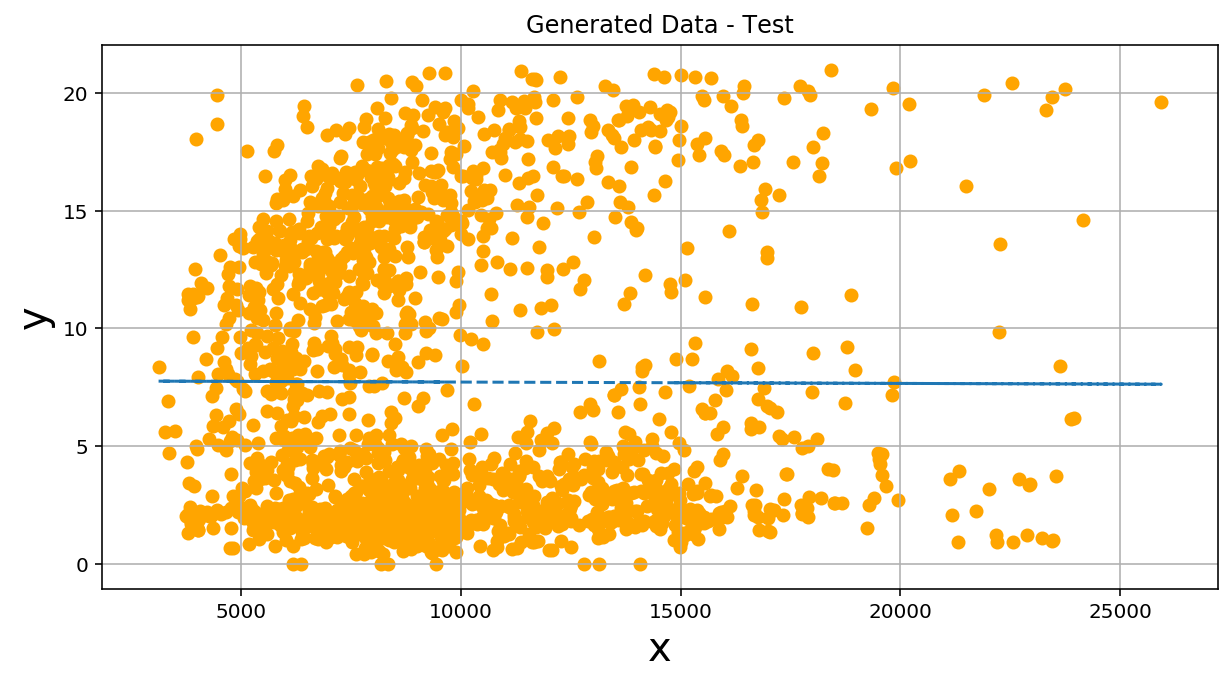

In [52]:
#plotting results
plt.figure(figsize=(10,5))
plt.plot(x_test, y_hat, '--')

plt.scatter(x_test,y_test, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')
plt.show()

In [53]:
print(linr.score(x_test, y_test)) #damage size- 0.03, mass npea- 0.00004, malign ratio= 0.14

4.20569752888067e-05


In [46]:
MAE = np.mean(abs(y_test - y_hat))
MAE

5.384998640436663

damage_size


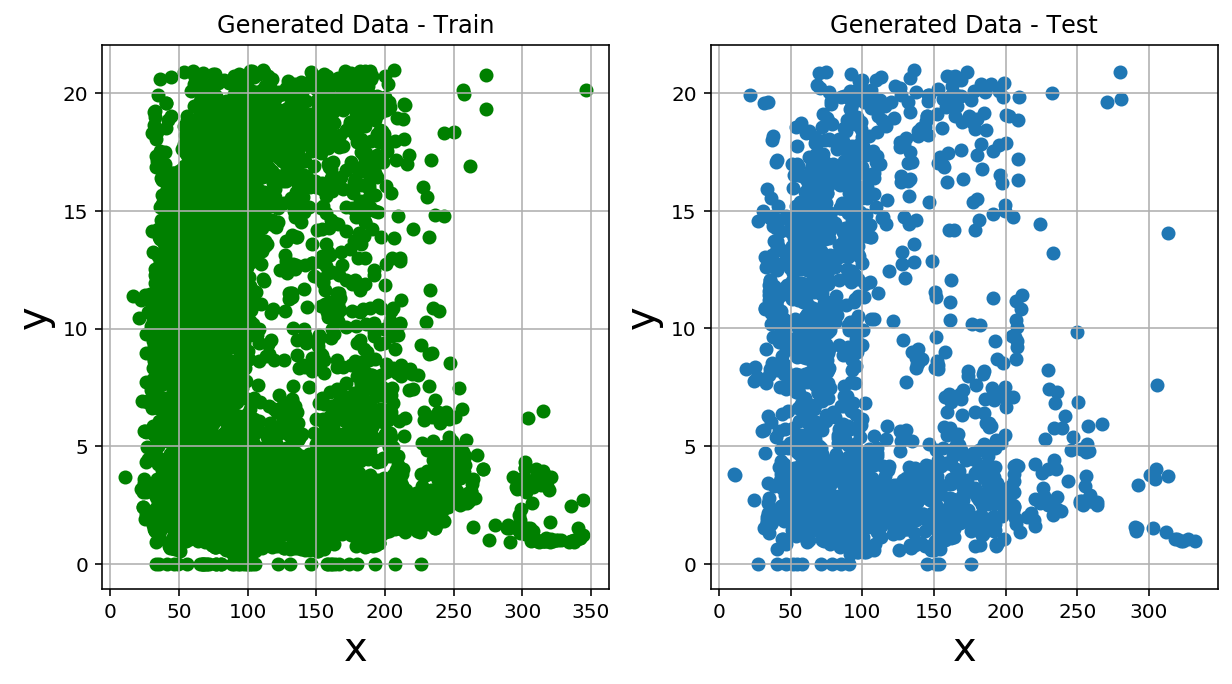

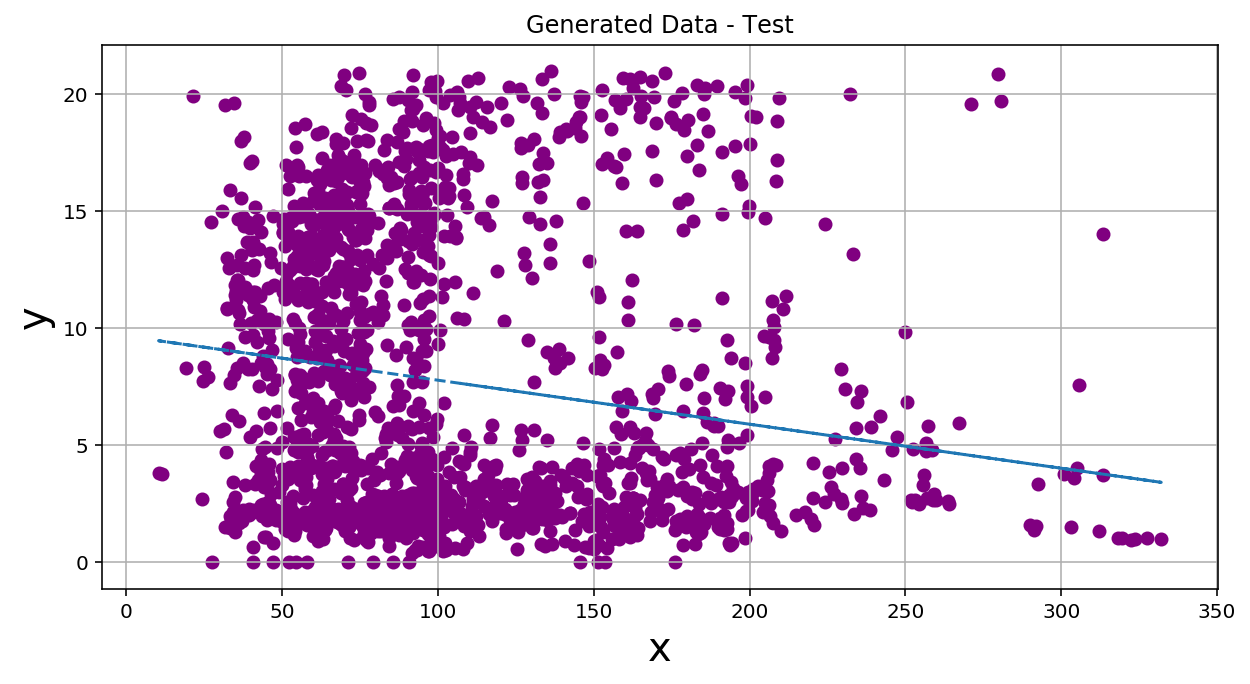

r^2= 0.01612690791571647
MAE= 5.432452300057794
 
mass_npea


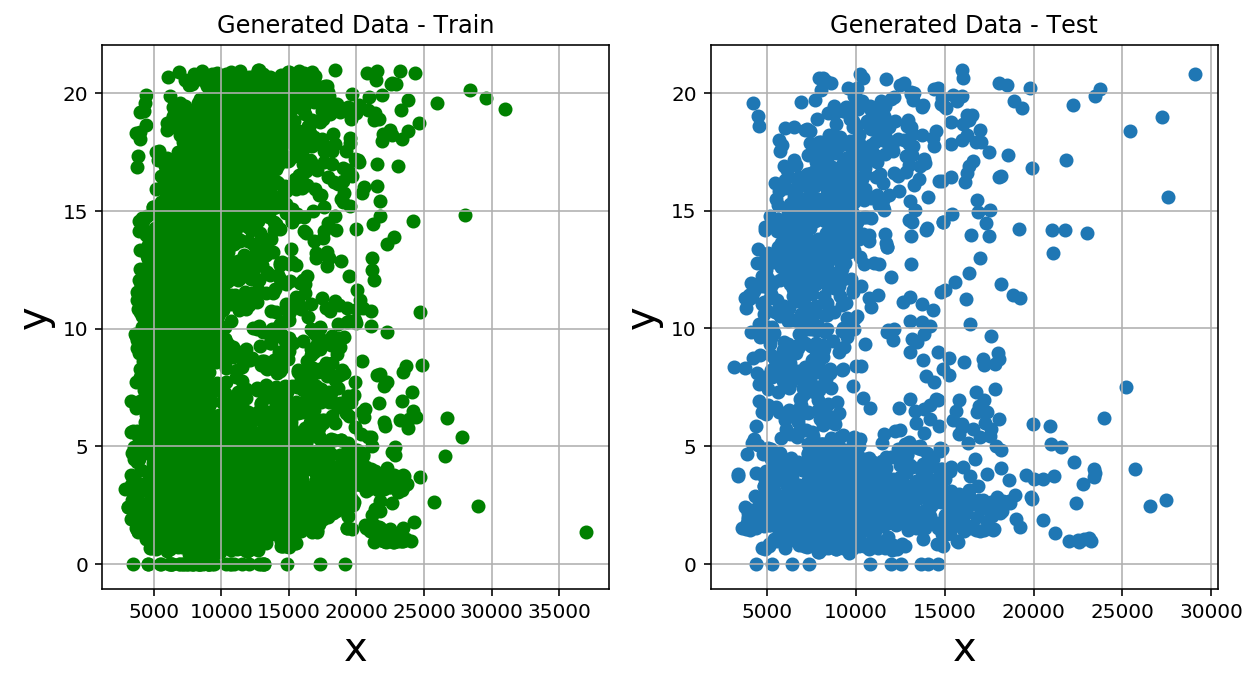

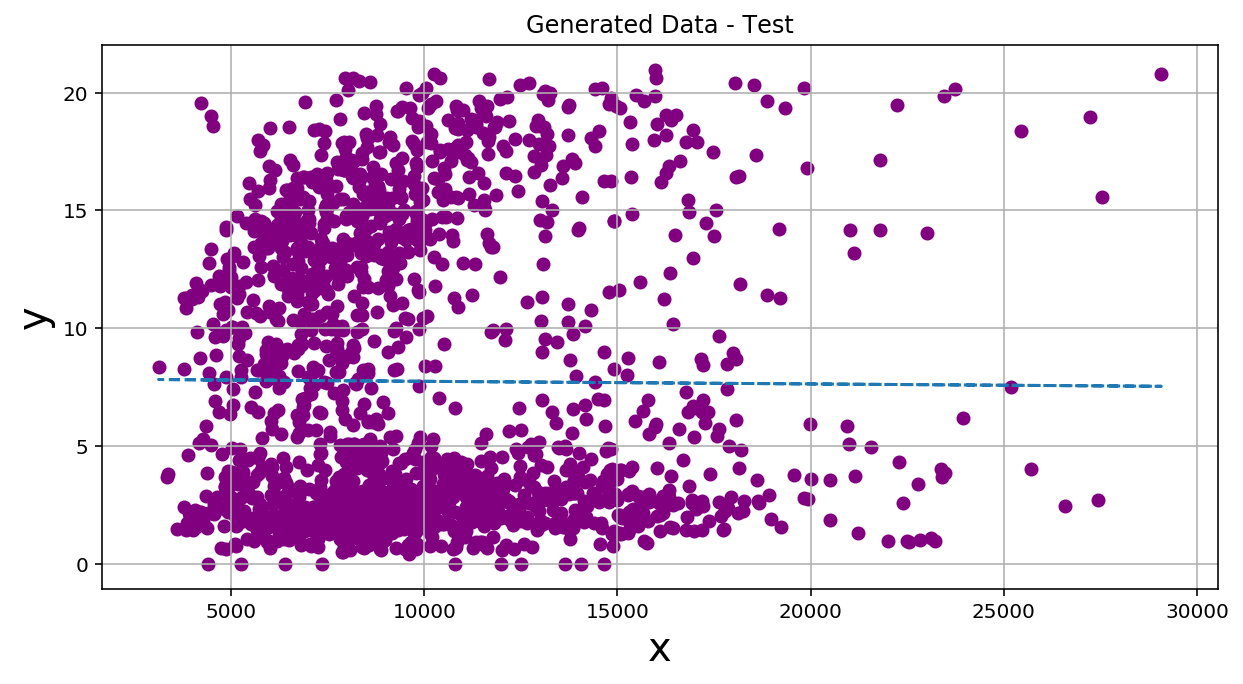

r^2= -0.000541712173101061
MAE= 5.504997516667437
 
size_npear


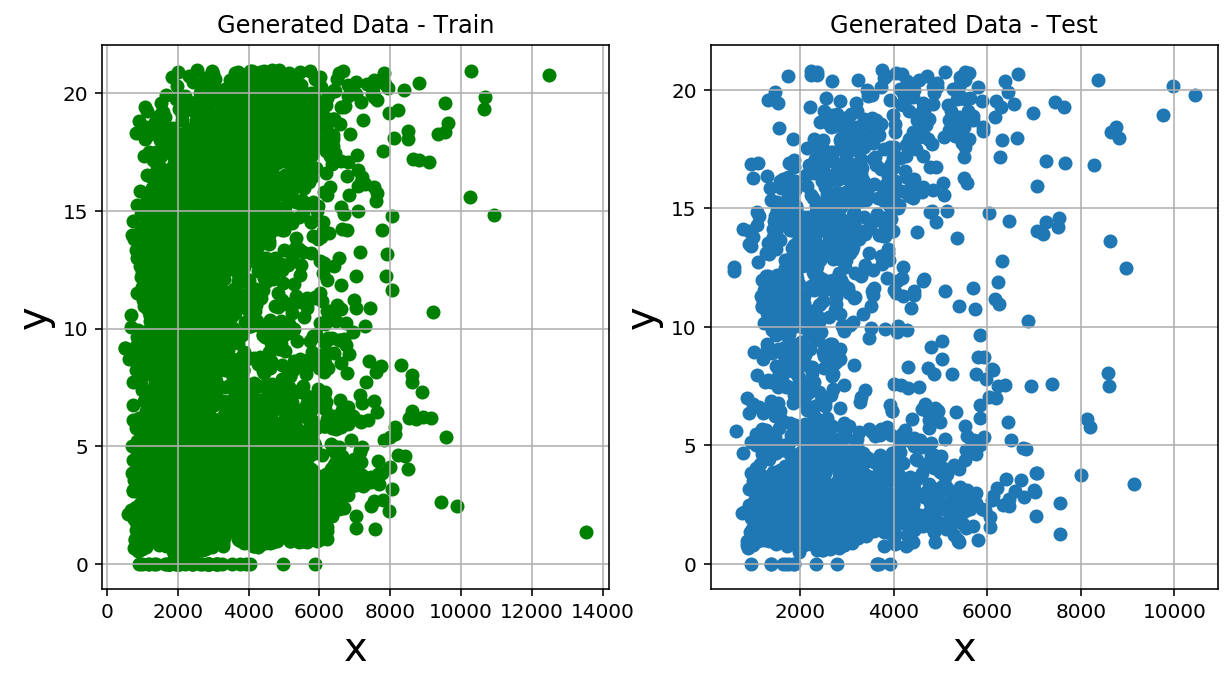

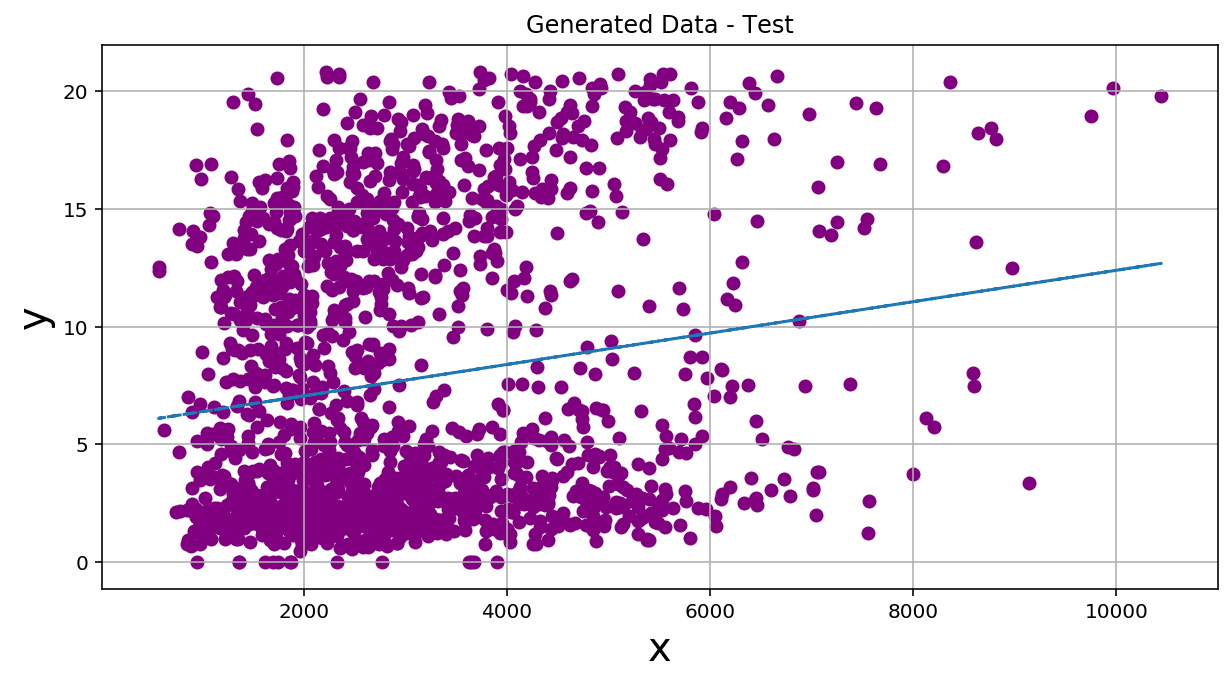

r^2= 0.03214506822264773
MAE= 5.519541360071374
 
malign_ratio


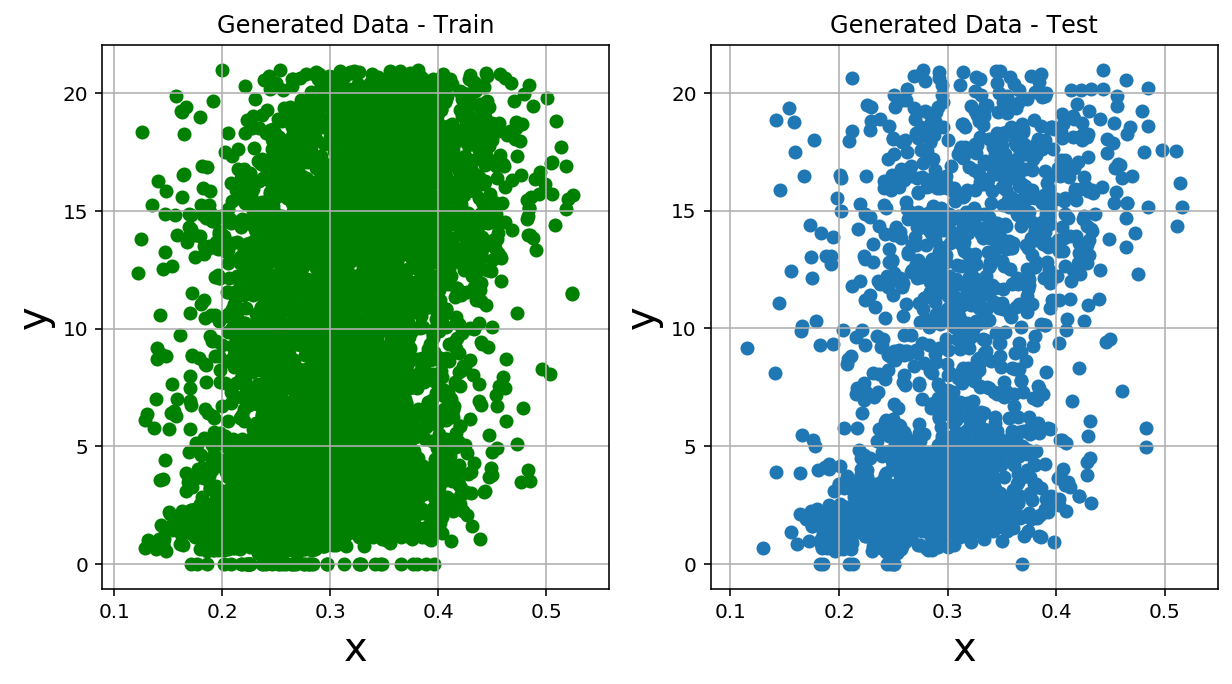

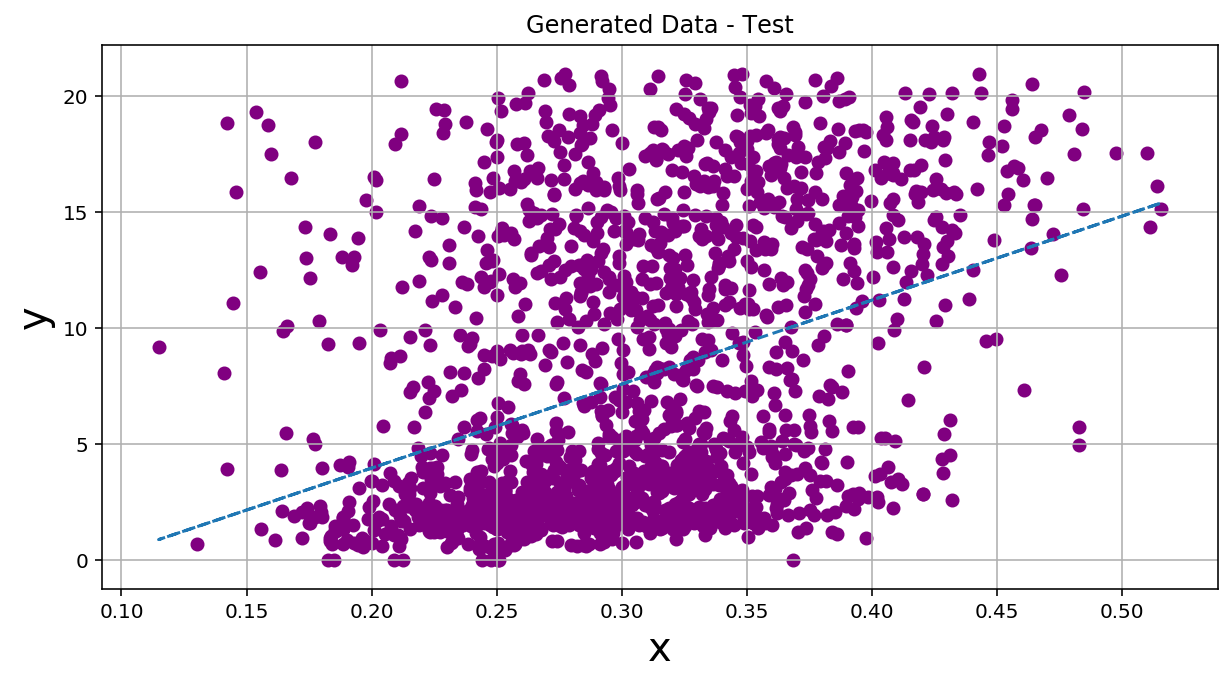

r^2= 0.14597754752005754
MAE= 5.66697379495873
 
err_malign


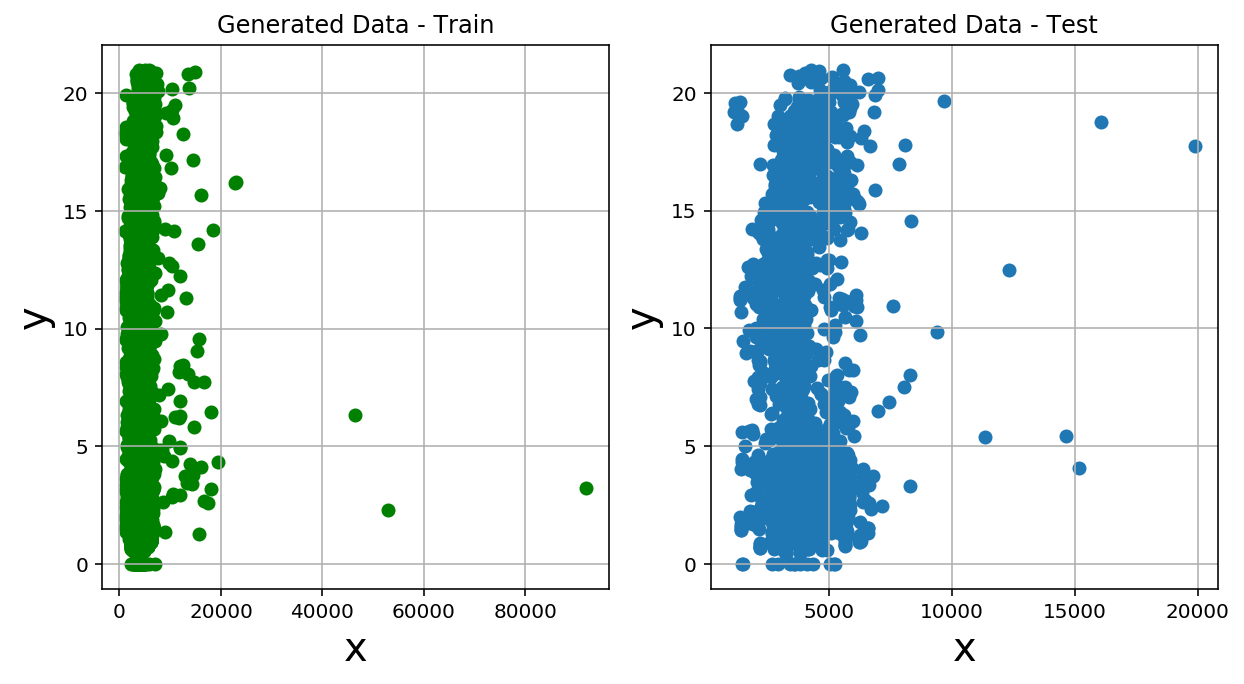

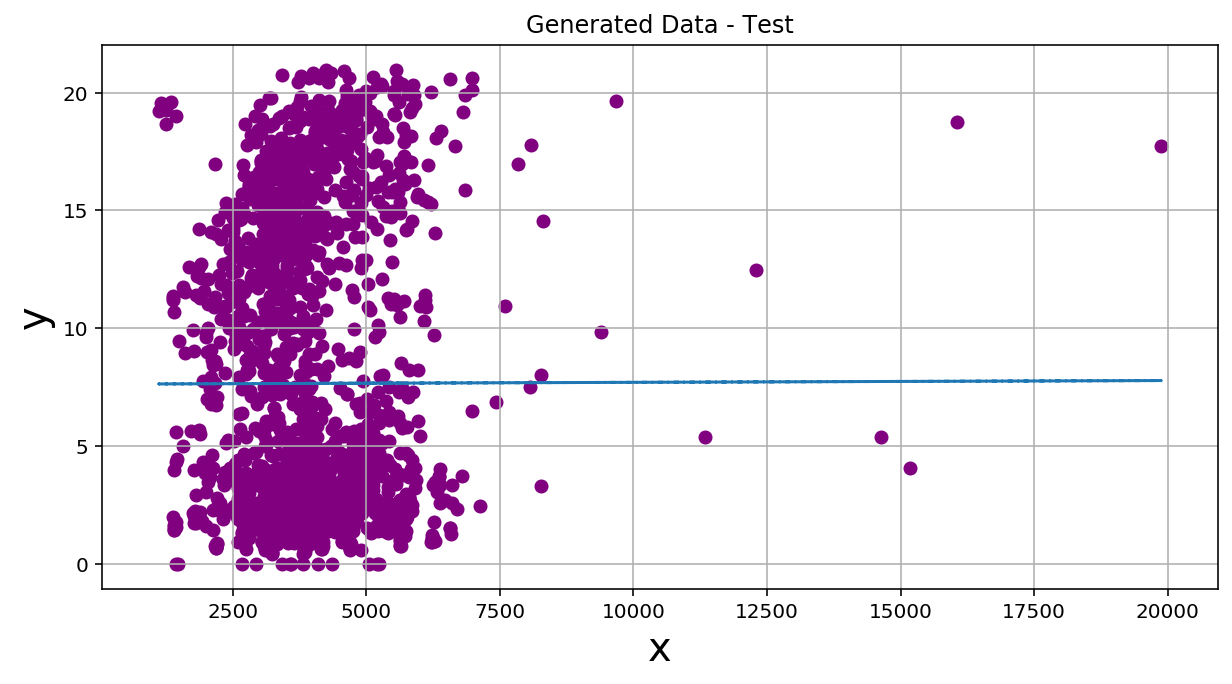

r^2= -0.002679913532989575
MAE= 5.608049901164655
 
damage_size


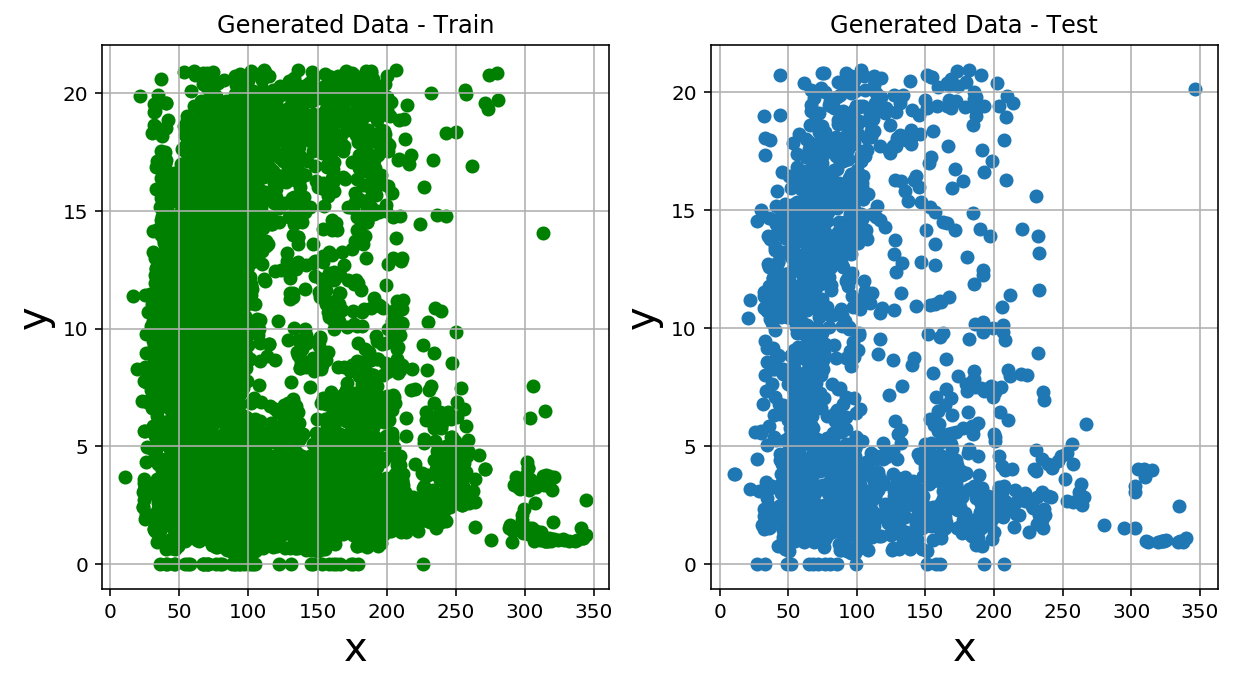

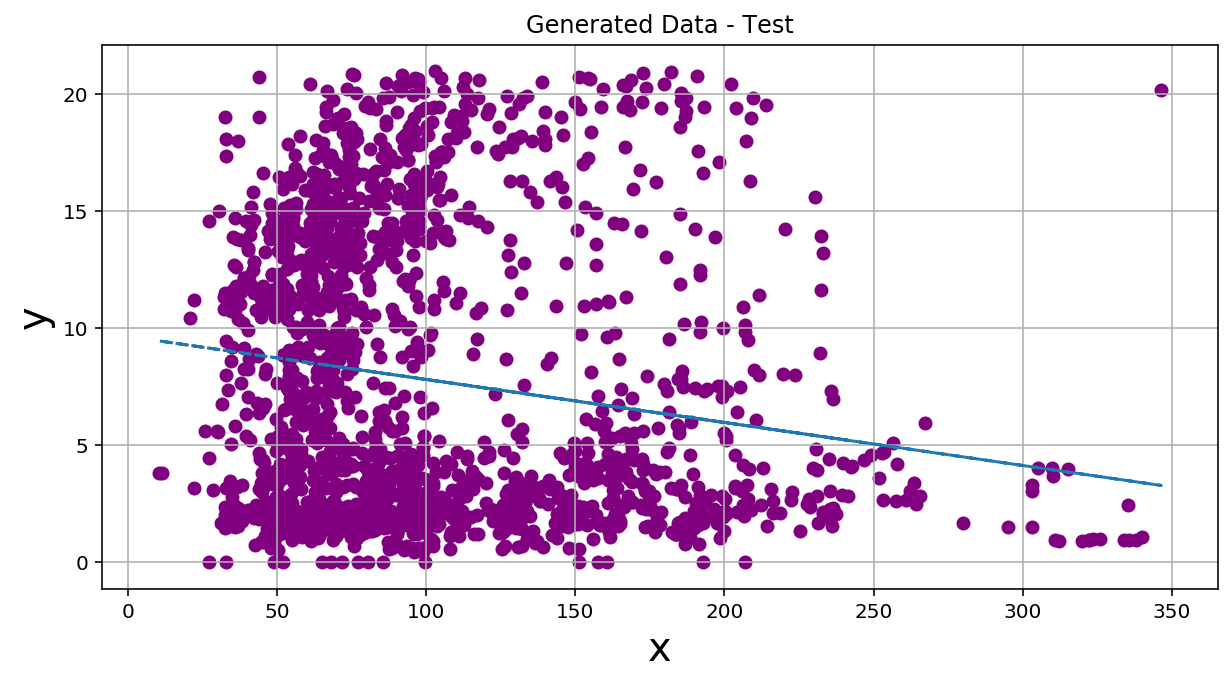

r^2= 0.02256741505568227
MAE= 5.440958994647515
 
exposed_area


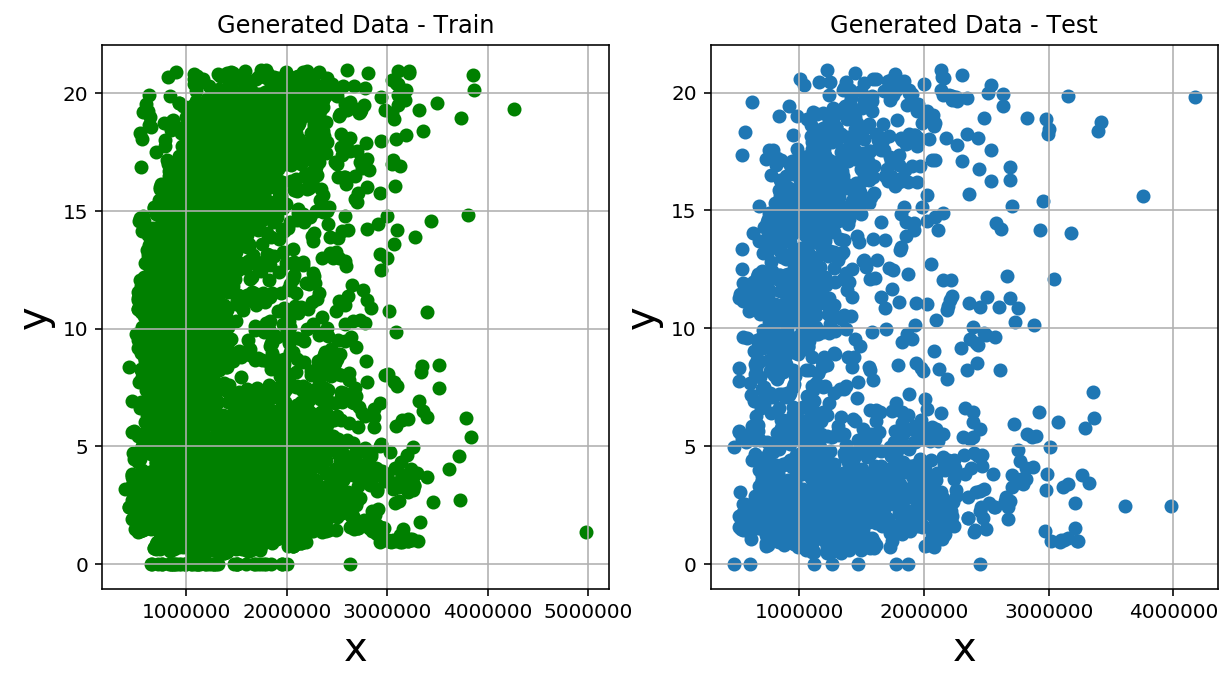

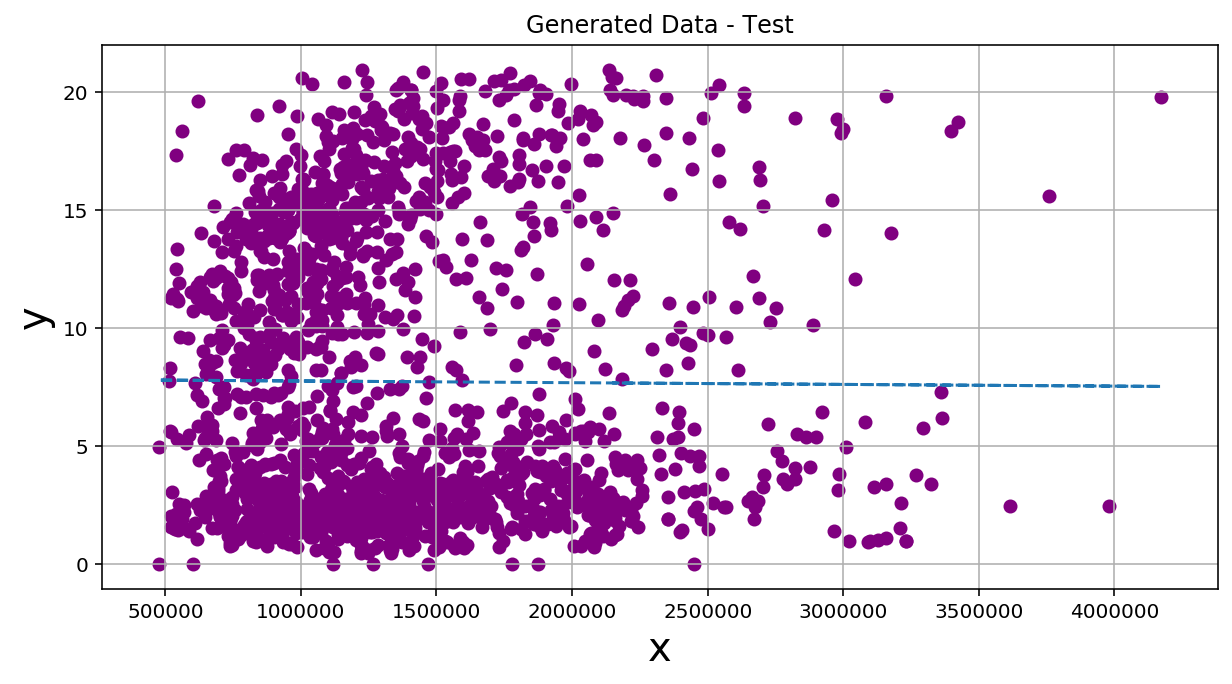

r^2= -0.0001881350208570165
MAE= 5.418049456929928
 
std_dev_malign


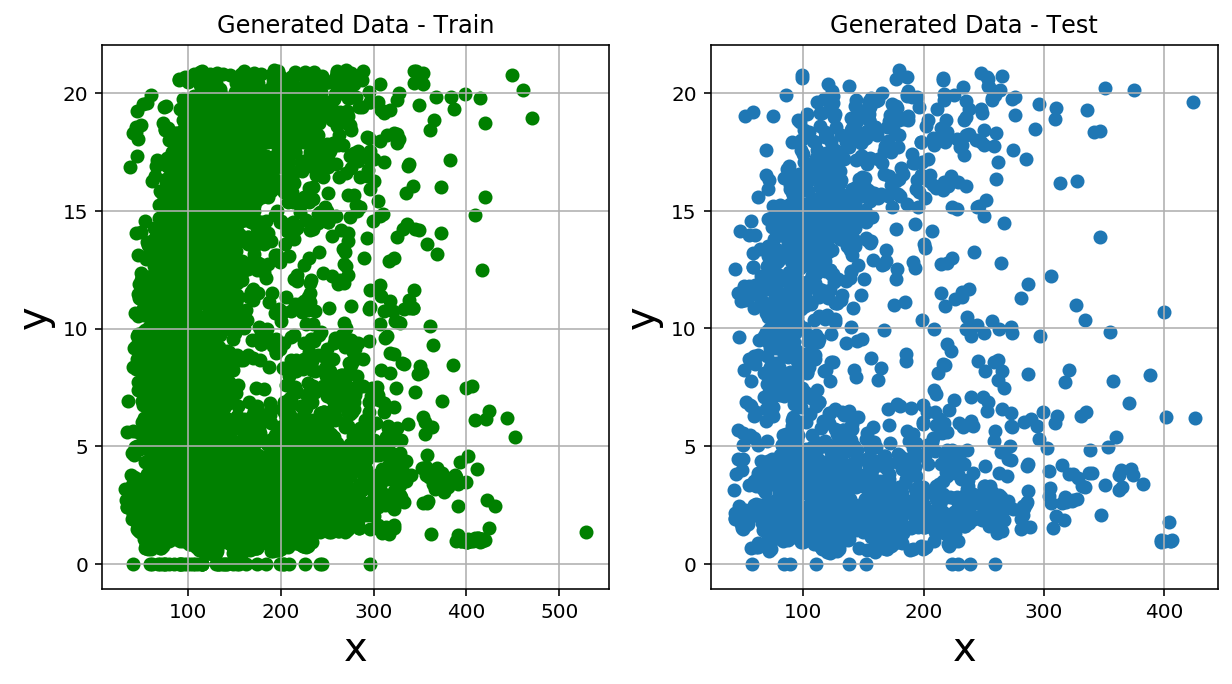

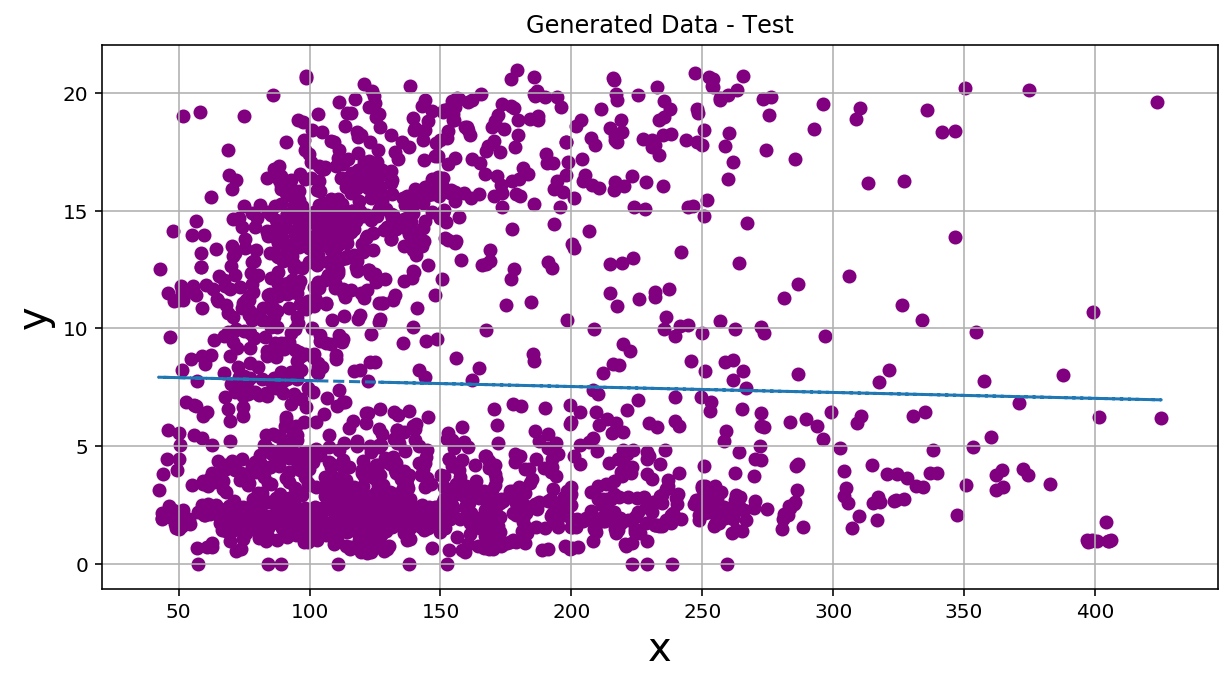

r^2= -0.0013334608996256048
MAE= 5.4600853267648235
 
malign_penalty


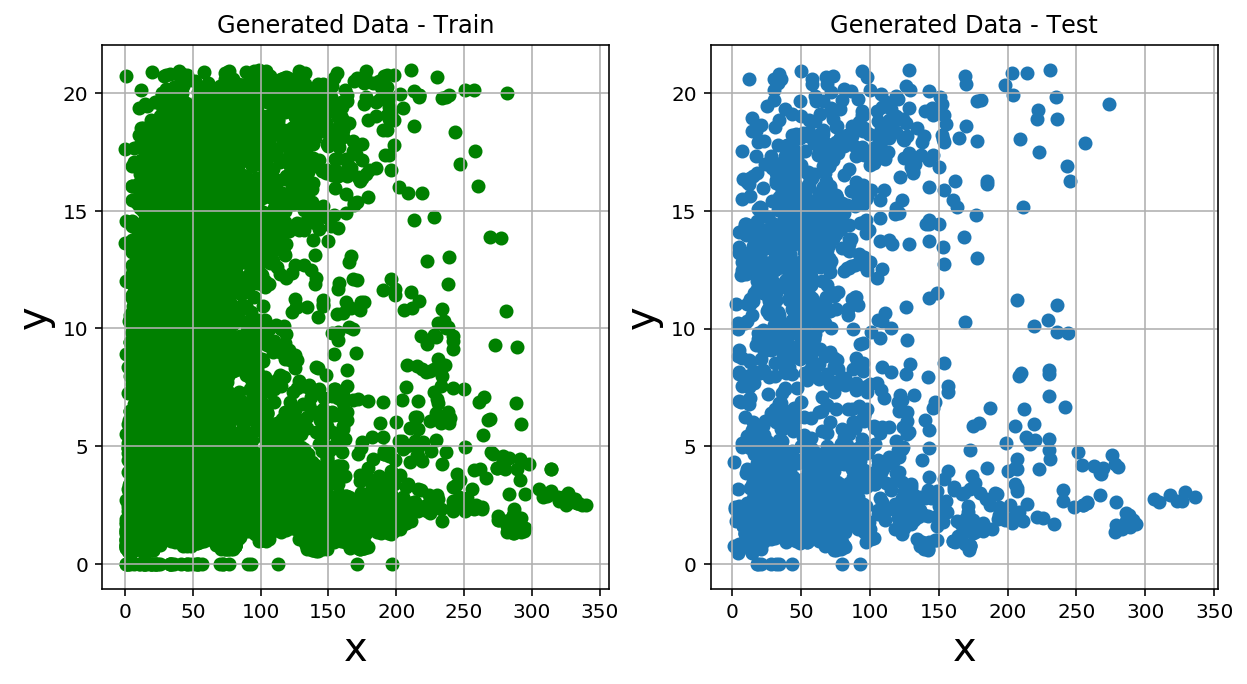

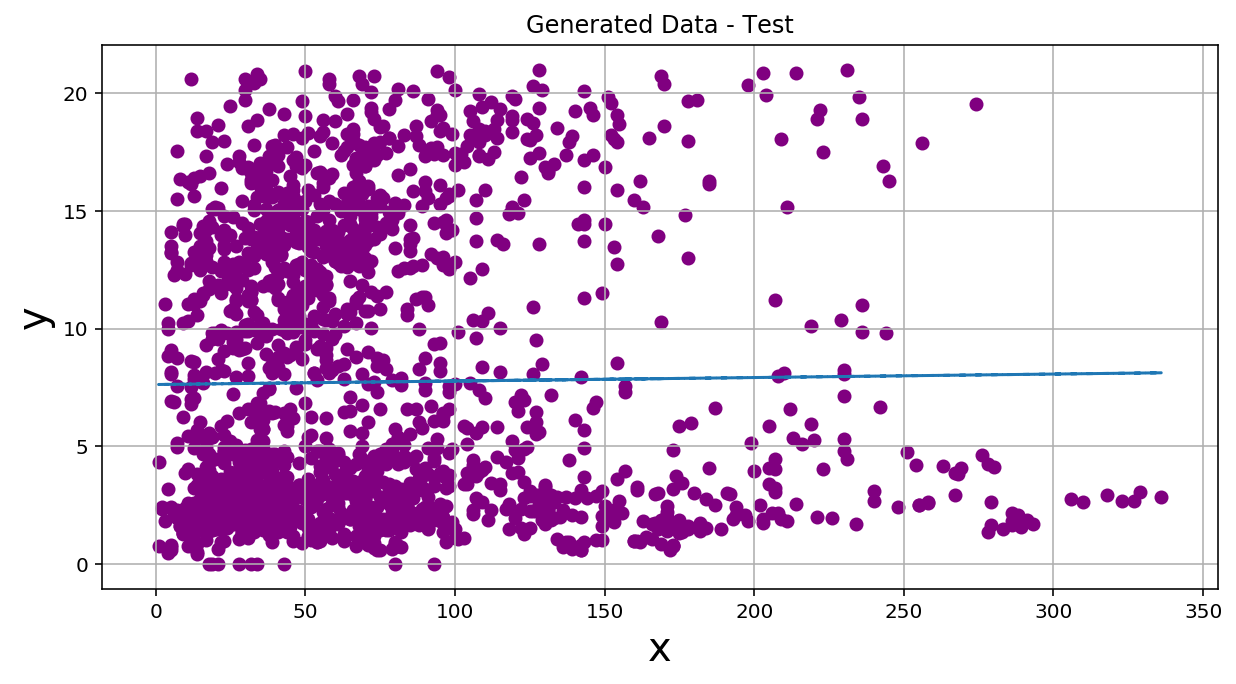

r^2= -3.5448263007387126e-05
MAE= 5.43092043389916
 
damage_ratio


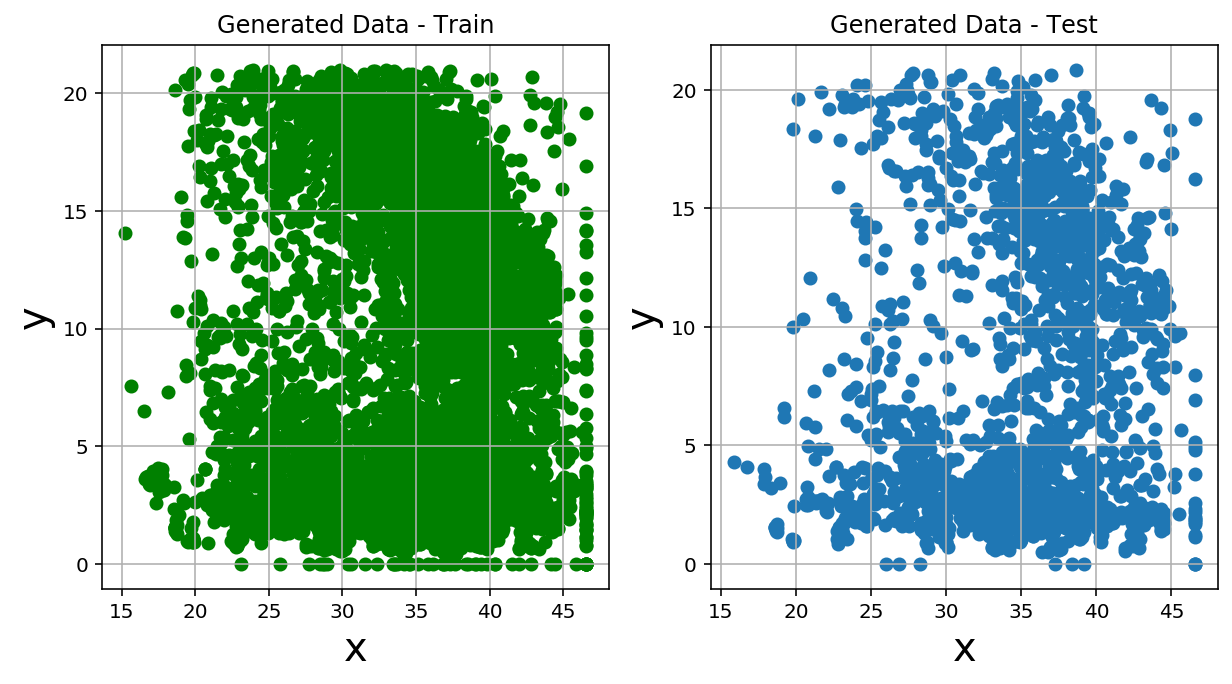

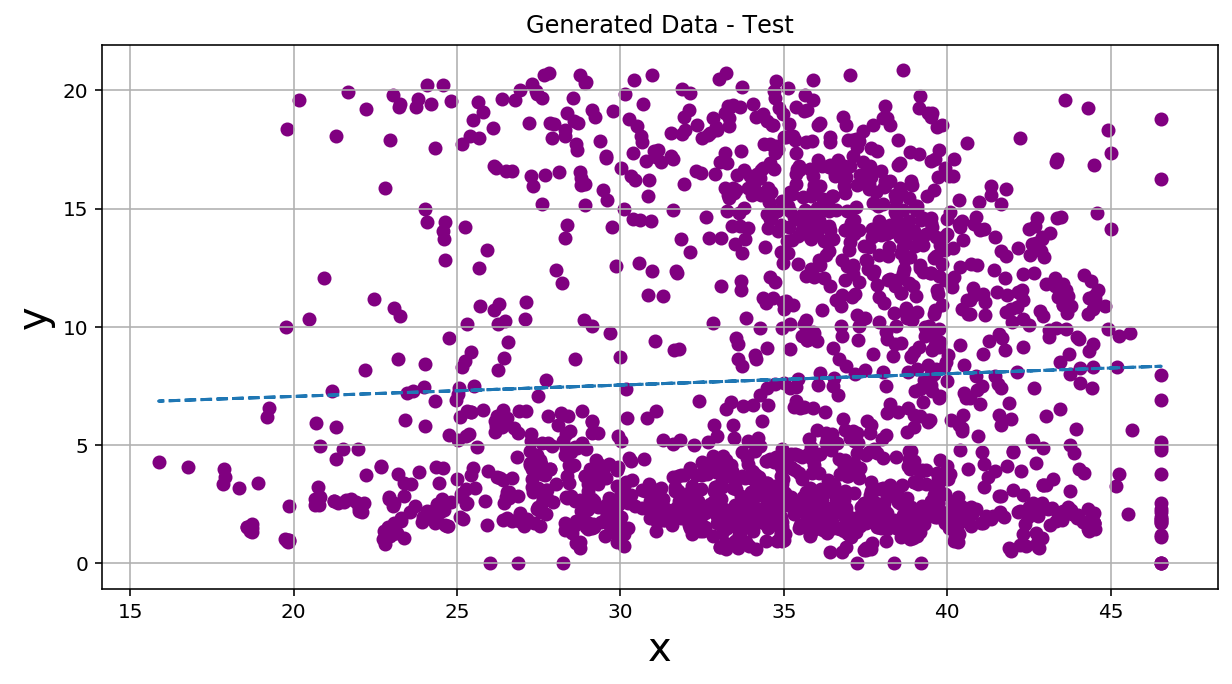

r^2= 0.005322427721047185
MAE= 5.3982401055525955
 
tumor_size


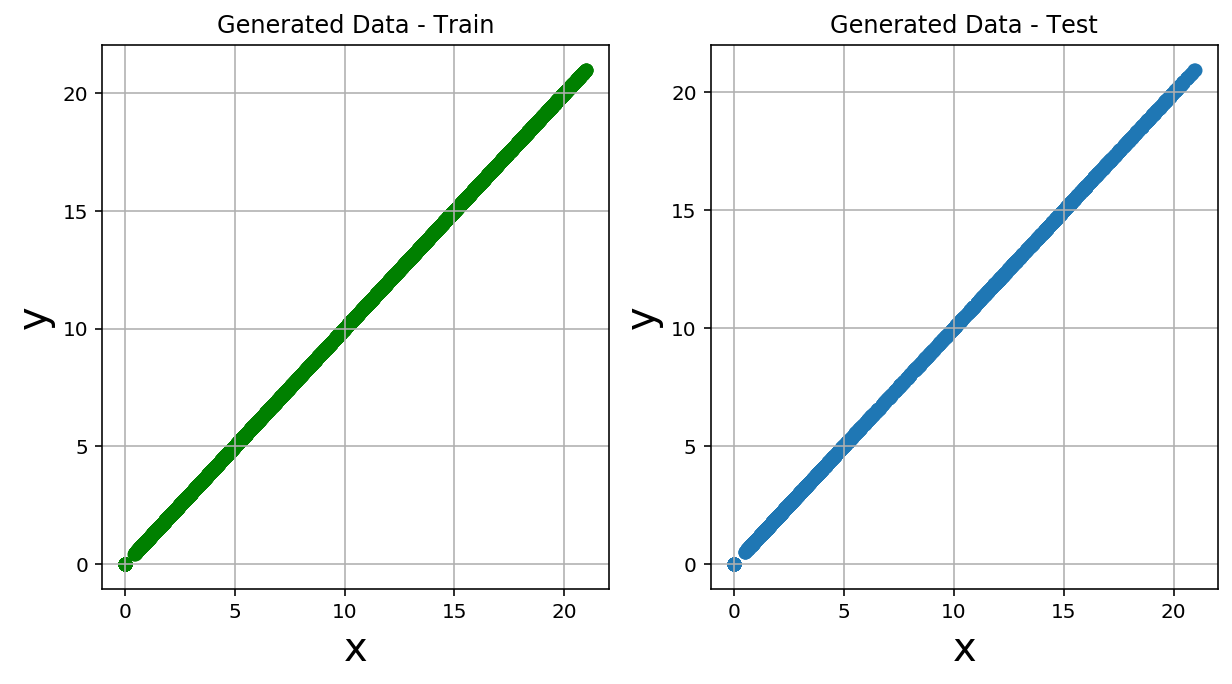

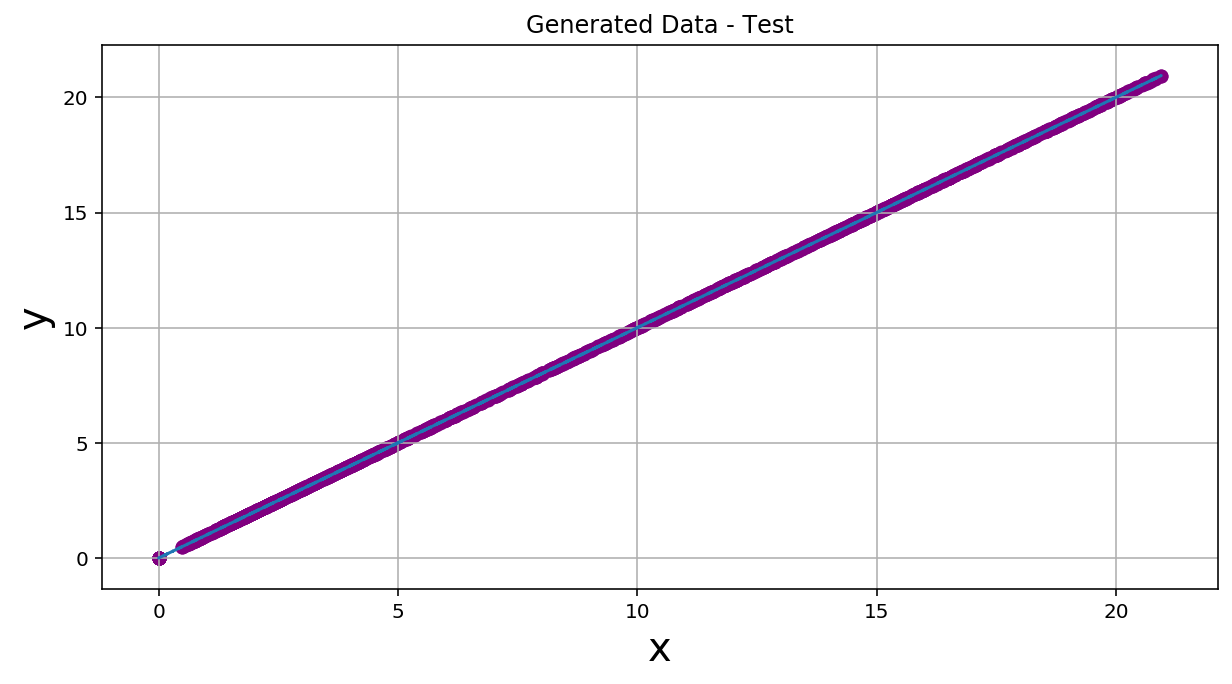

r^2= 1.0
MAE= 6.835606556182624
 
[0.01612690791571647, -0.000541712173101061, 0.03214506822264773, 0.14597754752005754, -0.002679913532989575, 0.02256741505568227, -0.0001881350208570165, -0.0013334608996256048, -3.5448263007387126e-05, 0.005322427721047185, 1.0]
[5.432452300057794, 5.504997516667437, 5.519541360071374, 5.66697379495873, 5.608049901164655, 5.440958994647515, 5.418049456929928, 5.4600853267648235, 5.43092043389916, 5.3982401055525955, 6.835606556182624]


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

columns= ["damage_size", "mass_npea", "size_npear", "malign_ratio", "err_malign", "damage_size", "exposed_area", "std_dev_malign", "malign_penalty", "damage_ratio", "tumor_size"]
melanoma_df = pd.read_csv("train.csv")
melanoma_df.head()
length= len(melanoma_df.index)
r=[]
mae=[]
for i in columns:
    print(i)
    X = melanoma_df[i].to_numpy()
    y = melanoma_df["tumor_size"].to_numpy()

    # Checking for Missing Data
    if X.shape[0] != y.shape[0]:
      print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")

    idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
    np.random.shuffle(idx)

    #split our data with 80% for training (learning) and 20% for testing.
    split_threshold = int(length * 0.8)

    train_idx = idx[:split_threshold]
    # Uses the remaining indices for testing
    test_idx = idx[split_threshold:]

    # Generates train and test sets and formats them for training.
    x_train, y_train = X[train_idx], y[train_idx]
    x_test, y_test = X[test_idx], y[test_idx]
    x_train= x_train.reshape(-1, 1)
    y_train= y_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)

    #let's plot our split data to see how it looks!
    plt.figure(figsize=(10,5))

    # plot the train set 
    plt.subplot(1,2,1)
    plt.scatter(x_train,y_train, c='green')  
    plt.xlabel('x', fontsize = 20) 
    plt.ylabel('y', fontsize = 20)
    plt.title('Generated Data - Train')
    plt.grid('on')

    # plot the test set 
    plt.subplot(1,2,2)
    plt.scatter(x_test, y_test)  
    plt.xlabel('x', fontsize = 20) 
    plt.ylabel('y', fontsize = 20)
    plt.title('Generated Data - Test')
    plt.grid('on')

    plt.show()

    from sklearn.linear_model import LinearRegression
    #Create the model object
    linr = LinearRegression()
    #Fit (train) the model -- this is where the ML happens!
    linr.fit(x_train, y_train)

    # Predicting using SKLearn
    y_hat = linr.predict(x_test)

    #plotting results
    plt.figure(figsize=(10,5))
    plt.plot(x_test, y_hat, '--')

    plt.scatter(x_test,y_test, c='purple')  
    plt.xlabel('x', fontsize = 20) 
    plt.ylabel('y', fontsize = 20)
    plt.title('Generated Data - Test')
    plt.grid('on')
    plt.show()

    value= linr.score(x_test, y_test)
    print("r^2=", linr.score(x_test, y_test))
    r.append(value)

    MAE = np.mean(abs(y_test - y_hat))
    print("MAE=", MAE)
    print(" ")
    mae.append(MAE)

print(r)
print(mae)

In [0]:
# r^2: damage_size= 0.0342, mass_npea= -0.00003, size_npear= 0.0256, malign_ratio= 0.1590, err_malign= -0.0002, damage_size=0.0273, exposed_area=-0.0004, std_dev_malign=0.0012, malign_penalty-0.0016, damage_ratio= 0.0012, tumor_size= 1.0
# negative r^2 value means a different model is a better fit
# MAE
